## DFO Nutrient Comparison

In [1]:
import sqlalchemy
from sqlalchemy import (create_engine, Column, String, Integer, Float, MetaData, 
                        Table, type_coerce, ForeignKey, case)
from sqlalchemy.orm import mapper, create_session, relationship, aliased, Session
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import case
import numpy as np
from sqlalchemy.ext.automap import automap_base
import matplotlib.pyplot as plt
import sqlalchemy.types as types
from sqlalchemy.sql import and_, or_, not_, func
from sqlalchemy.sql import select
import os
from os.path import isfile
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import datetime
import glob
import gsw

%matplotlib inline

In [2]:
PATH= '/data/eolson/MEOPAR/SS36runs/linkHC201812/'
start_date = datetime.datetime(2015,1,1)
end_date = datetime.datetime(2018,12,31)
flen=1
namfmt='nowcast'
#varmap={'N':'nitrate','Si':'silicon','Ammonium':'ammonium'}
filemap={'nitrate':'ptrc_T','silicon':'ptrc_T','ammonium':'ptrc_T','diatoms':'ptrc_T','ciliates':'ptrc_T','flagellates':'ptrc_T','vosaline':'grid_T','votemper':'grid_T'}
#gridmap={'nitrate':'tmask','silicon':'tmask','ammonium':'tmask'}
fdict={'ptrc_T':1,'grid_T':1}

df1=et.loadDFO()
df1.head()

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,Chlorophyll_Extracted,Chlorophyll_Extracted_units,N,Si,Silicate_units,AbsSal,ConsT,Z,dtUTC
0,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,12.0,NaN,None,5.28,mg/m^3,6.6,13.6,umol/L,NaN,NaN,12.0,1982-07-16 01:21:00
1,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,21.5,NaN,None,0.61,mg/m^3,21.2,45.0,umol/L,NaN,NaN,21.5,1982-07-16 01:21:00
2,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,30.5,NaN,None,NaN,mg/m^3,23.5,47.4,umol/L,NaN,NaN,30.5,1982-07-16 01:21:00
3,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,52.3,NaN,None,NaN,mg/m^3,28.0,50.2,umol/L,NaN,NaN,52.3,1982-07-16 01:21:00
4,1982.0,7.0,16.0,1.35,49.25,-123.943,NaN,75.4,NaN,None,NaN,mg/m^3,26.5,49.1,umol/L,NaN,NaN,75.4,1982-07-16 01:21:00


In [8]:
df2=df1.loc[(df1.Lat<48.6)&(df1.Lon<-124.7)]
df2.head()

,Year,Month,Day,Hour,Lat,Lon,Pressure,Depth,Ammonium,Ammonium_units,Chlorophyll_Extracted,Chlorophyll_Extracted_units,N,Si,Silicate_units,AbsSal,ConsT,Z,dtUTC
25,2008.0,6.0,20.0,13.969167,48.501167,-124.734667,2.0,NaN,NaN,None,4.37,mg/m^3,21.8,37.0,umol/L,31.779231,9.465428,1.983119,2008-06-20 13:58:09
26,2008.0,6.0,20.0,13.969167,48.501167,-124.734667,4.8,NaN,NaN,None,NaN,mg/m^3,18.2,31.1,umol/L,31.781527,9.449128,4.759454,2008-06-20 13:58:09
27,2008.0,6.0,20.0,13.969167,48.501167,-124.734667,9.7,NaN,NaN,None,3.69,mg/m^3,23.3,37.3,umol/L,31.845634,9.169437,9.617948,2008-06-20 13:58:09
28,2008.0,6.0,20.0,13.969167,48.501167,-124.734667,20.2,NaN,NaN,None,0.76,mg/m^3,29.4,45.9,umol/L,32.482873,8.245013,20.028618,2008-06-20 13:58:09
29,2008.0,6.0,20.0,13.969167,48.501167,-124.734667,30.0,NaN,NaN,None,NaN,mg/m^3,29.4,45.8,umol/L,32.717394,7.976543,29.744765,2008-06-20 13:58:09


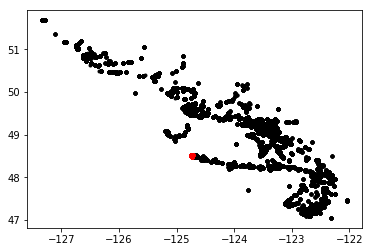

In [9]:
plt.plot(df1.Lon,df1.Lat,'k.')
plt.plot(df2.Lon,df2.Lat,'r.')

In [10]:
data=et.matchData(df2,filemap, fdict, start_date, end_date, namfmt, PATH, flen)

# Nitrate

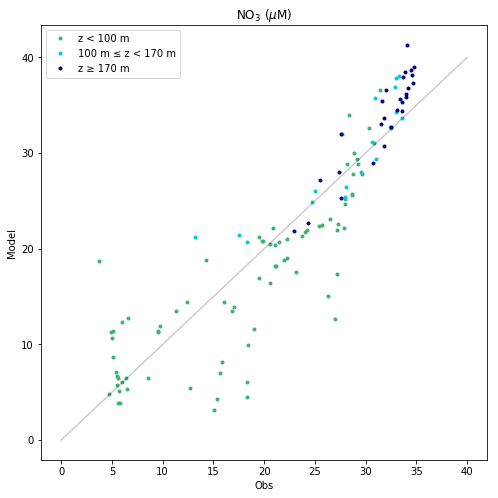

In [15]:
fig, ax = plt.subplots(figsize = (8,8))
ps=et.varvarPlot(ax,data,'N','mod_nitrate','Z',(100,170),'z','m',('mediumseagreen','darkturquoise','navy'))
ax.legend(handles=ps)
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.set_title('NO$_3$ ($\mu$M)')
ax.plot((0,40),(0,40),'k-',alpha=.2)

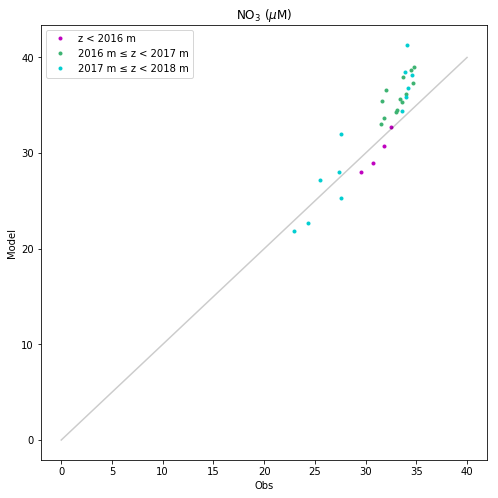

In [23]:
data2=data.loc[data.Z>150]
fig, ax = plt.subplots(figsize = (8,8))
ps=et.varvarPlot(ax,data2,'N','mod_nitrate','Year',(2016,2017,2018),'z','m',('m','mediumseagreen','darkturquoise','navy'))
ax.legend(handles=ps)
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.set_title('NO$_3$ ($\mu$M)')
ax.plot((0,40),(0,40),'k-',alpha=.2)

In [27]:
np.max(data2['N'])

34.81

In [40]:
#set max at 35
# start transitioning at 30
def ncor(NN,a):
    if NN>30:
        n1=NN-30
        n2=n1*n1/(a+n1)
    else:
        n2=NN
    return n2

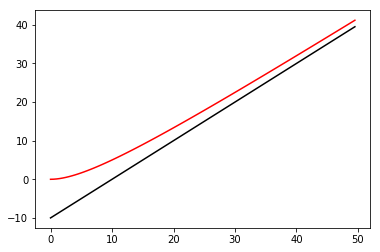

In [58]:
fig,ax=plt.subplots(1,1)
#ax.plot(data2['mod_nitrate']-30,data2['N']-data2['mod_nitrate'],'k.')
xx=np.arange(0,50,.5)
a=.3
b=3
ax.plot(xx,a*xx*xx/(b+a*xx),'r-')
ax.plot(xx,xx-b/a,'k-')
#ax.plot(xx,np.tanh(1/10*(xx-10))+1,'r-')

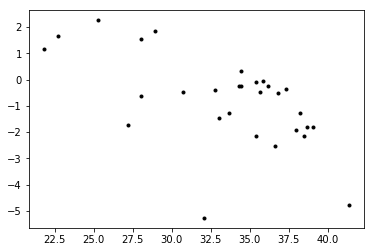

In [44]:
fig,ax=plt.subplots(1,1)
test=[ncor(ii,3) for ii in data2['mod_nitrate']]
ax.plot(data2['mod_nitrate'],data2['N']-test,'k.')

In [ ]:
dJDF=data.loc[(data.Lon<-123.6)&(data.Lat<48.6)]
dSJGI=data.loc[(data.Lon>=-123.6)&(data.Lat<48.9)]
dSOG=data.loc[(data.Lat>=48.9)&(data.Lon>-124.0)]
dNSOG=data.loc[(data.Lat>=48.9)&(data.Lon<=-124.0)]
fig, ax = plt.subplots(figsize = (8,8))
ps1=et.varvarPlot(ax,dJDF,'N','mod_nitrate',cols=('b','darkturquoise','navy'),lname='SJDF')
ps2=et.varvarPlot(ax,dSJGI,'N','mod_nitrate',cols=('c','darkturquoise','navy'),lname='SJGI')
ps3=et.varvarPlot(ax,dSOG,'N','mod_nitrate',cols=('y','darkturquoise','navy'),lname='SOG')
ps4=et.varvarPlot(ax,dNSOG,'N','mod_nitrate',cols=('m','darkturquoise','navy'),lname='NSOGF')
ax.legend(handles=[ps1[0][0],ps2[0][0],ps3[0][0],ps4[0][0]])
ax.set_xlabel('Obs')
ax.set_ylabel('Model')
ax.set_title('NO$_3$ ($\mu$M)')
ax.plot((0,40),(0,40),'-',color='gray',alpha=.5)

In [ ]:
# where are high Ns coming from?
fig, ax = plt.subplots(figsize = (8,8))
viz_tools.set_aspect(ax, coords = 'map')
ax.plot(dfhiN['Lon'], dfhiN['Lat'], 'ro',label='N>36')
d1=dfhiN.loc[(dfhiN.mod_nitrate>38)]
ax.plot(d1['Lon'],d1['Lat'],'b.',label='N>38')
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
viz_tools.plot_coastline(ax, grid, coords = 'map')
ax.set_ylim(48, 50.5)
ax.legend()
ax.set_xlim(-125.7, -122.5);

In [ ]:
# where are high Ns coming from?
fig,ax=plt.subplots(1,3,figsize=(12,3))
dfhiN=data.loc[data.mod_nitrate>36]
ax[0].hist(dfhiN.Z,5)
ax[0].set_xlabel('Depth (m)')
ax[1].hist(dfhiN.Year)
ax[1].set_xlabel('Year')
ax[2].hist(dfhiN.Month)
ax[2].set_xlabel('Month')
print('Model Nitrate > 36 $\mu$M')

In [ ]:
d1

In [ ]:
obc=nc.Dataset('/results/forcing/LiveOcean/boundary_conditions/LiveOcean_v201712_y2016m09d26.nc')
obc.variables.keys()

In [ ]:
fig,ax=plt.subplots(1,1)
m=ax.pcolormesh(obc.variables['xbT'],obc.variables['deptht'][:],obc.variables['NO3'][0,:,0,:])
fig.colorbar(m)
ax.set_ylim(450,0)
ax.set_xlabel('xbT')
ax.set_ylabel('Depth')

In [ ]:
# is Si also too high?
plt.plot(dfhiN['Si'],dfhiN['mod_silicon'],'k.')